
# Мартьянова Александра Евгеньевна, курс «Data Science», ВКР

# Часть 1. Статистические модели

### Загрузка библиотек

In [408]:
# Загрузка разных библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
from scipy.stats import f_oneway
from scipy.interpolate import interp1d

### 1. Подготовка и предобработка данных

Для обработки следует оставить первые 23 строки, поскольку остальные строки состоят из случайных чисел с нормальным распределением, недостающие данные получены путем интерполяции данных специально подготовленного датасета

###### Датасет со свойствами композитов

Загрузка специально подготовленного датасета для дальнейшей интерполяции:

In [409]:
# Загрузка в объект DataFrame файла 'X_bp&X_nup.xlsx', метод read_excel
df_s = pd.read_excel('X_bp&X_nup_.xlsx', index_col = 0)
df_s.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Метка
0,1.857143,2030.0,738.736842,30.0,22.267857,100.0,210.0,70.0,3000.0,220.0,0,4.0,57.0,Yes
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,No
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,No
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,No


In [410]:
# Вывод сведений о новом объекте DataFrame df_s, метод info()
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1100
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       23 non-null     float64
 1   Плотность, кг/м3                      23 non-null     float64
 2   модуль упругости, ГПа                 23 non-null     float64
 3   Количество отвердителя, м.%           23 non-null     float64
 4   Содержание эпоксидных групп,%_2       23 non-null     float64
 5   Температура вспышки, С_2              23 non-null     float64
 6   Поверхностная плотность, г/м2         23 non-null     float64
 7   Модуль упругости при растяжении, ГПа  23 non-null     float64
 8   Прочность при растяжении, МПа         23 non-null     float64
 9   Потребление смолы, г/м2               23 non-null     float64
 10  Угол нашивки, град                    1101 non-null   int64  
 11  Шаг нашивки      

In [411]:
# Изменение типа данных индекса, метод astype('int')
df_s.index = df_s.index.astype('int')
df_s

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Метка
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.000000,3000.000000,220.0,0,4.0,57.0,Yes
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,No
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,No
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,No
1097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,No
1098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,No
1099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,NaN,NaN,No


Вывод: индексы - целые числа

In [412]:
# Проверка наличия пропусков типа NULL и NaN в объекте DataFrame, методы isnull(), isna() и sum()
print(df_s.isnull().sum())
print()
print(df_s.isna().sum())

Соотношение матрица-наполнитель         1078
Плотность, кг/м3                        1078
модуль упругости, ГПа                   1078
Количество отвердителя, м.%             1078
Содержание эпоксидных групп,%_2         1078
Температура вспышки, С_2                1078
Поверхностная плотность, г/м2           1078
Модуль упругости при растяжении, ГПа    1078
Прочность при растяжении, МПа           1078
Потребление смолы, г/м2                 1078
Угол нашивки, град                         0
Шаг нашивки                             1078
Плотность нашивки                       1078
Метка                                      0
dtype: int64

Соотношение матрица-наполнитель         1078
Плотность, кг/м3                        1078
модуль упругости, ГПа                   1078
Количество отвердителя, м.%             1078
Содержание эпоксидных групп,%_2         1078
Температура вспышки, С_2                1078
Поверхностная плотность, г/м2           1078
Модуль упругости при растяжении, ГПа    1

Вывод: датасете присутствует большое количество пропусков со значениями 'NaN', эти пропуски необходимо будет заполнить данными в результате интерполяции

In [413]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
df_s.duplicated().sum()

1076

Вывод: имеются дубликаты в датасете, которые представляют собой строки с ячеями заполненными в основном 'NaN'

In [414]:
# Определение количества строк и столбцов датасета df_s, метод shape
df_s.shape

(1101, 14)

In [415]:
# Проверка количества уникальных значений в каждом столбце датасета df_s, метод nunique()
df_s.nunique()

Соотношение матрица-наполнитель         14
Плотность, кг/м3                        13
модуль упругости, ГПа                   20
Количество отвердителя, м.%              5
Содержание эпоксидных групп,%_2          4
Температура вспышки, С_2                 3
Поверхностная плотность, г/м2            4
Модуль упругости при растяжении, ГПа     4
Прочность при растяжении, МПа            4
Потребление смолы, г/м2                  3
Угол нашивки, град                       2
Шаг нашивки                              6
Плотность нашивки                        5
Метка                                    2
dtype: int64

Вывод: в колонке 'Угол нашивки, град' всего два значения, в остальных столбцах больше

In [416]:
# Определение уникальных значений в столбце 'Угол нашивки, град', метод unique()
df_s['Угол нашивки, град'].unique()

array([ 0, 90], dtype=int64)

In [417]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df_s.dtypes['Угол нашивки, град']

dtype('int64')

In [418]:
# Изменение типа данных столбца 'Угол нашивки, град', метод astype('int')
df_s['Угол нашивки, град'] = df_s['Угол нашивки, град'].astype(int)

In [419]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df_s.dtypes['Угол нашивки, град']

dtype('int32')

In [420]:
df_s_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1100
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1101 non-null   float64
 1   Плотность, кг/м3                      1101 non-null   float64
 2   модуль упругости, ГПа                 1101 non-null   float64
 3   Количество отвердителя, м.%           1101 non-null   float64
 4   Содержание эпоксидных групп,%_2       1101 non-null   float64
 5   Температура вспышки, С_2              1101 non-null   float64
 6   Поверхностная плотность, г/м2         1101 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1101 non-null   float64
 8   Прочность при растяжении, МПа         1101 non-null   float64
 9   Потребление смолы, г/м2               1101 non-null   float64
 10  Угол нашивки, град                    1101 non-null   int32  
 11  Шаг нашивки      

Интерполяция данных:

In [421]:
# интерполяция недостающими данными, метод interpolate библиотеки scipy.interpolate
interpolate_columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 
                       'модуль упругости, ГПа', 'Количество отвердителя, м.%', 
                       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2', 
                       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 
                       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2', 'Шаг нашивки', 
                       'Плотность нашивки']
for col in interpolate_columns:
    df_s[col] = df_s[col].interpolate(limit_direction = 'both', kind = 'cubic')    

In [422]:
df_s

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,Метка
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.000000,3000.000000,220.0,0,4.0,57.00,Yes
1,1.857143,2030.0,738.736842,30.40,22.297500,103.692308,210.0,70.000000,3000.000000,220.0,0,4.0,57.06,No
2,1.857143,2030.0,738.736842,30.80,22.327143,107.384615,210.0,70.000000,3000.000000,220.0,0,4.0,57.12,No
3,1.857143,2030.0,738.736842,31.20,22.356786,111.076923,210.0,70.000000,3000.000000,220.0,0,4.0,57.18,No
4,1.857143,2030.0,738.736842,31.60,22.386429,114.769231,210.0,70.000000,3000.000000,220.0,0,4.0,57.24,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,3.834650,1883.2,608.720000,111.86,22.267857,284.615385,470.0,73.333333,2455.555556,220.0,90,4.0,59.76,No
1097,3.883269,1882.4,612.040000,111.86,22.267857,284.615385,470.0,73.333333,2455.555556,220.0,90,4.0,59.82,No
1098,3.931888,1881.6,615.360000,111.86,22.267857,284.615385,470.0,73.333333,2455.555556,220.0,90,4.0,59.88,No
1099,3.980507,1880.8,618.680000,111.86,22.267857,284.615385,470.0,73.333333,2455.555556,220.0,90,4.0,59.94,No


Проверка качества интерполяции

In [423]:
pd.set_option('use_inf_as_na', True)
for col in interpolate_columns:
    print(col, 'Inf+Nan: ', df_s[col].isnull().sum())

Соотношение матрица-наполнитель Inf+Nan:  0
Плотность, кг/м3 Inf+Nan:  0
модуль упругости, ГПа Inf+Nan:  0
Количество отвердителя, м.% Inf+Nan:  0
Содержание эпоксидных групп,%_2 Inf+Nan:  0
Температура вспышки, С_2 Inf+Nan:  0
Поверхностная плотность, г/м2 Inf+Nan:  0
Модуль упругости при растяжении, ГПа Inf+Nan:  0
Прочность при растяжении, МПа Inf+Nan:  0
Потребление смолы, г/м2 Inf+Nan:  0
Шаг нашивки Inf+Nan:  0
Плотность нашивки Inf+Nan:  0


In [424]:
# Описательная статистика датасета df_s, метод describe()
df_s.describe()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000,1101.000000
mean,2.918634,1979.750227,741.334528,113.681589,22.267857,288.723538,475.785649,73.407508,2443.440307,220.000000,12.261580,6.543143,55.843324
std,0.783850,62.279796,287.558268,24.568710,2.041260,25.239693,287.199572,2.969528,460.449280,50.335168,30.887901,2.491736,11.484472
min,1.598174,1880.000000,205.000000,30.000000,21.250000,100.000000,210.000000,70.000000,1800.000000,120.000000,0.000000,0.000000,0.000000
25%,2.327459,1926.400000,549.160000,111.860000,21.250000,284.615385,210.000000,70.000000,2000.000000,220.000000,0.000000,4.080000,52.600000
50%,2.884130,1973.400000,738.736842,123.515200,21.575714,296.000000,380.000000,73.333333,2455.555556,220.000000,0.000000,7.000000,58.080000
75%,3.494317,2030.000000,799.920000,129.000000,22.267857,300.000000,644.600000,75.720000,3000.000000,231.200000,0.000000,9.000000,62.000000
max,4.897959,2160.000000,1628.000000,129.000000,33.000000,300.000000,1010.000000,78.000000,3000.000000,300.000000,90.000000,10.000000,70.000000


In [425]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
df_s.duplicated().sum()

0

Вывод: дубликаты отсутствуют

Загрузка и подготовка датасета с исходными данными, подготовка среза [0 : 22]

In [426]:
# Загрузка в объект DataFrame файла X_bp.xlsx, метод read_excel
x_bp = pd.read_excel('X_bp.xlsx', index_col = 0)
x_bp.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0.0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0
1.0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0
2.0,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0
3.0,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0
4.0,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0


In [427]:
# Определение количества строк и столбцов объекта, метод shape
x_bp.shape

(1023, 10)

In [428]:
# Вывод сведений об объекте DataFrame, метод info()
x_bp.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(10)
memory usage: 87.9 KB


In [429]:
# Загрузка в объект DataFrame файла X_nup.xlsx, метод read_excel
x_nup = pd.read_excel('X_nup.xlsx', index_col = 0)
x_nup.head()

,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,0.0,4.0,57.0
1.0,0.0,4.0,60.0
2.0,0.0,4.0,70.0
3.0,0.0,5.0,47.0
4.0,0.0,5.0,57.0


In [430]:
# Определение количества строк и столбцов объекта, метод shape
x_nup.shape

(1040, 3)

In [431]:
# Вывод сведений об объекте DataFrame, метод info()
x_nup.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1040 entries, 0.0 to 1039.0
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Угол нашивки, град  1040 non-null   float64
 1   Шаг нашивки         1040 non-null   float64
 2   Плотность нашивки   1040 non-null   float64
dtypes: float64(3)
memory usage: 32.5 KB


In [432]:
# соединение объектов DataFrame, метод merge, объединение по индексу, тип объединения INNER
df_s1 = x_bp.merge(x_nup, how = 'inner', left_index = True, right_index = True)
df_s1.head(30)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.0,57.0
1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.0,60.0
2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.0,70.0
3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.0,47.0
4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.0,57.0
5.0,2.767918,2000.000000,748.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.0,60.0
6.0,2.569620,1910.000000,807.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.0,70.0
7.0,2.561475,1900.000000,535.000000,111.860000,22.267857,284.615385,380.000000,75.000000,1800.000000,120.000000,0.0,7.0,47.0
8.0,3.557018,1930.000000,889.000000,129.000000,21.250000,300.000000,380.000000,75.000000,1800.000000,120.000000,0.0,7.0,57.0
9.0,3.532338,2100.000000,1421.000000,129.000000,21.250000,300.000000,1010.000000,78.000000,2000.000000,300.000000,0.0,7.0,60.0


In [433]:
# Вывод сведений о новом объекте DataFrame df_s, метод info()
df_s1.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 1023 entries, 0.0 to 1022.0
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1023 non-null   float64
 1   Плотность, кг/м3                      1023 non-null   float64
 2   модуль упругости, ГПа                 1023 non-null   float64
 3   Количество отвердителя, м.%           1023 non-null   float64
 4   Содержание эпоксидных групп,%_2       1023 non-null   float64
 5   Температура вспышки, С_2              1023 non-null   float64
 6   Поверхностная плотность, г/м2         1023 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 8   Прочность при растяжении, МПа         1023 non-null   float64
 9   Потребление смолы, г/м2               1023 non-null   float64
 10  Угол нашивки, град                    1023 non-null   float64
 11  Шаг нашивки

In [434]:
# Изменение типа данных индекса, метод astype('int')
df_s1.index = df_s1.index.astype('int')
df_s1

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


In [435]:
# Проверка наличия пропусков типа NULL и NaN в объекте DataFrame, методы isnull(), isna() и sum()
print(df_s1.isnull().sum())
print()
print(df_s1.isna().sum())

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град  

In [436]:
# Проверка наличия дубликатов в объекте DataFrame, методы duplicated() и sum()
df_s1.duplicated().sum()

0

In [437]:
# Определение количества строк и столбцов датасета df_s, метод shape
df_s1.shape

(1023, 13)

In [438]:
# Проверка количества уникальных значений в каждом столбце датасета df_s, метод nunique()
df_s1.nunique()

Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
Угол нашивки, град                         2
Шаг нашивки                              989
Плотность нашивки                        988
dtype: int64

In [439]:
# Изменение типа данных переменной 'Угол нашивки, град', метод astype('int')
df_s1['Угол нашивки, град'] = df_s1['Угол нашивки, град'].astype(int)

In [440]:
# Тип данных столбца 'Угол нашивки, град', метод dtypes()
df_s1.dtypes['Угол нашивки, град']

dtype('int32')

In [441]:
# Для обработки следует оставить первые 23 строки, поскольку остальные строки
# состоят из случайных чисел с нормальным распределением
df_s1 = df_s1[:22]
df_s1

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.000000,3000.000000,220.0,0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.000000,3000.000000,220.0,0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.000000,3000.000000,220.0,0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.000000,3000.000000,220.0,0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0,5.0,57.0
5,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0,5.0,60.0
6,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.000000,3000.000000,220.0,0,5.0,70.0
7,2.561475,1900.0,535.000000,111.86,22.267857,284.615385,380.0,75.000000,1800.000000,120.0,0,7.0,47.0
8,3.557018,1930.0,889.000000,129.00,21.250000,300.000000,380.0,75.000000,1800.000000,120.0,0,7.0,57.0
9,3.532338,2100.0,1421.000000,129.00,21.250000,300.000000,1010.0,78.000000,2000.000000,300.0,0,7.0,60.0


### 2. Оценка нормальности распределения параметров

Вывод: Оценка производилась ранее

### 3. Оценка корреляции параметров

Корреляция оценивается по критерию Спирмена

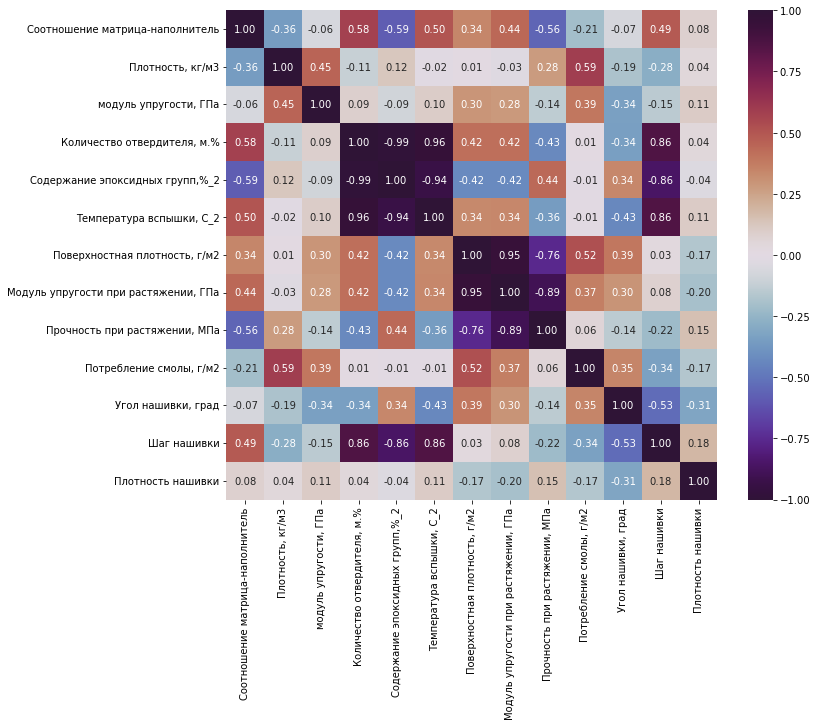

In [442]:
# Мартица корреляции по ранговому критерию корреляции Спирмена для категориальных и количественно-категориальных параметров
fig, ax = plt.subplots(figsize=(11, 9)) # аргумент 'spearman' указывает на критерий Спирмена
hm = sns.heatmap(df_s.corr(method = 'spearman'),  vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)

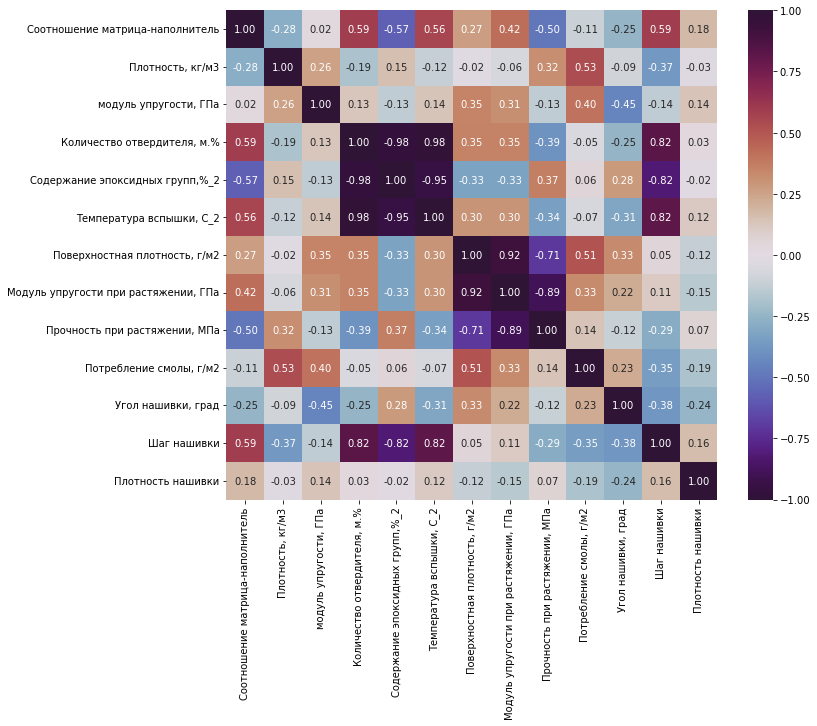

In [443]:
# Мартица корреляции по ранговому критерию корреляции Спирмена для категориальных и количественно-категориальных параметров
fig, ax = plt.subplots(figsize=(11, 9)) # аргумент 'spearman' указывает на критерий Спирмена
hm = sns.heatmap(df_s1.corr(method = 'spearman'),  vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='twilight_shifted', ax=ax)

Вывод: тепловые карты обладают большой схожестью

In [444]:
# Вывод сведений о названиях столбцов датасета df_s, метод columns
df_s.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки', 'Метка'],
      dtype='object')

In [445]:
# Вывод сведений о названиях столбцов датасета df_s, метод columns
df_s1.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки, град', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

Проверка корреляции по критерию Спирмена:

формулировка гипотезы: 

H0: R = 0, 

H1: R не равен 0 с заданным уровнем значимости равным 0,05

Ранее было показано, что по тесту Шапиро-Уилка все параметры имеют вид распределения статистически отличный от нормального, поэтому

In [446]:
# Проверка по критерию Спирмена
count = 0 
for col in df_s.columns:
    print()
    count += 1
    print(count)
    print(col)
    for col1 in df_s.columns[count:]:
        alpha = 0.05
        stat, p = stats.spearmanr(df_s[col], df_s[col1]) # Критерий Спирмена
        if p > alpha:
            print()
        else:
            print()
            print(f'Наименование колонок и строк С корреляцией: ')
            print(col, ' & ', col1, ': \t\t \n'  'Statistics=%.3f, p-value=%.3f' % (stat, p))



1
Соотношение матрица-наполнитель

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Плотность, кг/м3 : 		 
Statistics=-0.356, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  модуль упругости, ГПа : 		 
Statistics=-0.064, p-value=0.035

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Количество отвердителя, м.% : 		 
Statistics=0.578, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Содержание эпоксидных групп,%_2 : 		 
Statistics=-0.586, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Температура вспышки, С_2 : 		 
Statistics=0.503, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Поверхностная плотность, г/м2 : 		 
Statistics=0.343, p-value=0.000

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Модуль

Вывод: кроме того для параметров

    Соотношение матрица-наполнитель  &  Плотность, кг/м3 : Statistics=-0.356, p-value=0.000
    Соотношение матрица-наполнитель  &  модуль упругости, ГПа : Statistics=-0.064, p-value=0.035
    Соотношение матрица-наполнитель  &  Количество отвердителя, м.% : Statistics=0.578, p-value=0.000
    Соотношение матрица-наполнитель  &  Содержание эпоксидных групп,%_2 : Statistics=-0.586, p-value=0.000
    Соотношение матрица-наполнитель  &  Температура вспышки, С_2 : Statistics=0.503, p-value=0.000
    Соотношение матрица-наполнитель  &  Поверхностная плотность, г/м2 : Statistics=0.343, p-value=0.000
    Соотношение матрица-наполнитель  &  Модуль упругости при растяжении, ГПа : Statistics=0.441, p-value=0.000
    Соотношение матрица-наполнитель  &  Прочность при растяжении, МПа : Statistics=-0.557, p-value=0.000
    Соотношение матрица-наполнитель  &  Потребление смолы, г/м2 : Statistics=-0.209, p-value=0.000
    Соотношение матрица-наполнитель  &  Угол нашивки, град : Statistics=-0.069, p-value=0.022
    Соотношение матрица-наполнитель  &  Шаг нашивки : Statistics=0.490, p-value=0.000
    Соотношение матрица-наполнитель  &  Плотность нашивки : Statistics=0.082, p-value=0.007
    Плотность, кг/м3  &  модуль упругости, ГПа : Statistics=0.454, p-value=0.000
    Плотность, кг/м3  &  Количество отвердителя, м.% : Statistics=-0.115, p-value=0.000
    Плотность, кг/м3  &  Содержание эпоксидных групп,%_2 : Statistics=0.124, p-value=0.000
    Плотность, кг/м3  &  Прочность при растяжении, МПа : Statistics=0.275, p-value=0.000
    Плотность, кг/м3  &  Потребление смолы, г/м2 : Statistics=0.591, p-value=0.000
    Плотность, кг/м3  &  Угол нашивки, град : Statistics=-0.187, p-value=0.000
    Плотность, кг/м3  &  Шаг нашивки : Statistics=-0.282, p-value=0.000
    модуль упругости, ГПа  &  Количество отвердителя, м.% : Statistics=0.089, p-value=0.003
    модуль упругости, ГПа  &  Содержание эпоксидных групп,%_2 : Statistics=-0.088, p-value=0.003
    модуль упругости, ГПа  &  Температура вспышки, С_2 : Statistics=0.101, p-value=0.001
    модуль упругости, ГПа  &  Поверхностная плотность, г/м2 : Statistics=0.296, p-value=0.000
    модуль упругости, ГПа  &  Модуль упругости при растяжении, ГПа : Statistics=0.285, p-value=0.000
    модуль упругости, ГПа  &  Прочность при растяжении, МПа : Statistics=-0.141, p-value=0.000
    модуль упругости, ГПа  &  Потребление смолы, г/м2 : Statistics=0.392, p-value=0.000
    модуль упругости, ГПа  &  Угол нашивки, град : Statistics=-0.337, p-value=0.000
    модуль упругости, ГПа  &  Шаг нашивки : Statistics=-0.146, p-value=0.000
    модуль упругости, ГПа  &  Плотность нашивки : Statistics=0.105, p-value=0.000
    Количество отвердителя, м.%  &  Содержание эпоксидных групп,%_2 : Statistics=-0.991, p-value=0.000
    Количество отвердителя, м.%  &  Температура вспышки, С_2 : Statistics=0.961, p-value=0.000
    Количество отвердителя, м.%  &  Поверхностная плотность, г/м2 : Statistics=0.417, p-value=0.000
    Количество отвердителя, м.%  &  Модуль упругости при растяжении, ГПа : Statistics=0.417, p-value=0.000
    Количество отвердителя, м.%  &  Прочность при растяжении, МПа : Statistics=-0.429, p-value=0.000
    Количество отвердителя, м.%  &  Угол нашивки, град : Statistics=-0.345, p-value=0.000
    Количество отвердителя, м.%  &  Шаг нашивки : Statistics=0.860, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Температура вспышки, С_2 : Statistics=-0.936, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Поверхностная плотность, г/м2 : Statistics=-0.425, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Модуль упругости при растяжении, ГПа : Statistics=-0.424, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Прочность при растяжении, МПа : Statistics=0.436, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Угол нашивки, град : Statistics=0.338, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Шаг нашивки : Statistics=-0.856, p-value=0.000
    Температура вспышки, С_2  &  Поверхностная плотность, г/м2 : Statistics=0.337, p-value=0.000
    Температура вспышки, С_2  &  Модуль упругости при растяжении, ГПа : Statistics=0.339, p-value=0.000
    Температура вспышки, С_2  &  Прочность при растяжении, МПа : Statistics=-0.356, p-value=0.000
    Температура вспышки, С_2  &  Угол нашивки, град : Statistics=-0.433, p-value=0.000
    Температура вспышки, С_2  &  Шаг нашивки : Statistics=0.856, p-value=0.000
    Температура вспышки, С_2  &  Плотность нашивки : Statistics=0.106, p-value=0.000
    Поверхностная плотность, г/м2  &  Модуль упругости при растяжении, ГПа : Statistics=0.951, p-value=0.000
    Поверхностная плотность, г/м2  &  Прочность при растяжении, МПа : Statistics=-0.758, p-value=0.000
    Поверхностная плотность, г/м2  &  Потребление смолы, г/м2 : Statistics=0.525, p-value=0.000
    Поверхностная плотность, г/м2  &  Угол нашивки, град : Statistics=0.391, p-value=0.000
    Поверхностная плотность, г/м2  &  Плотность нашивки : Statistics=-0.171, p-value=0.000
    Модуль упругости при растяжении, ГПа  &  Прочность при растяжении, МПа : Statistics=-0.895, p-value=0.000
    Модуль упругости при растяжении, ГПа  &  Потребление смолы, г/м2 : Statistics=0.366, p-value=0.000
    Модуль упругости при растяжении, ГПа  &  Угол нашивки, град : Statistics=0.299, p-value=0.000
    Модуль упругости при растяжении, ГПа  &  Шаг нашивки : Statistics=0.082, p-value=0.007
    Модуль упругости при растяжении, ГПа  &  Плотность нашивки : Statistics=-0.196, p-value=0.000
    Прочность при растяжении, МПа  &  Угол нашивки, град : Statistics=-0.145, p-value=0.000
    Прочность при растяжении, МПа  &  Шаг нашивки : Statistics=-0.221, p-value=0.000
    Прочность при растяжении, МПа  &  Плотность нашивки : Statistics=0.149, p-value=0.000
    Потребление смолы, г/м2  &  Угол нашивки, град : Statistics=0.346, p-value=0.000
    Потребление смолы, г/м2  &  Шаг нашивки : Statistics=-0.336, p-value=0.000
    Потребление смолы, г/м2  &  Плотность нашивки : Statistics=-0.166, p-value=0.000
    Угол нашивки, град  &  Шаг нашивки : Statistics=-0.535, p-value=0.000
    Угол нашивки, град  &  Плотность нашивки : Statistics=-0.314, p-value=0.000
    Шаг нашивки  &  Плотность нашивки : Statistics=0.184, p-value=0.000

In [447]:
# Проверка по критерию Спирмена
count = 0 
for col in df_s1.columns:
    print()
    count += 1
    print(count)
    print(col)
    for col1 in df_s1.columns[count:]:
        alpha = 0.05
        stat, p = stats.spearmanr(df_s1[col], df_s1[col1]) # Критерий Спирмена
        if p > alpha:
            print()
        else:
            print()
            print(f'Наименование колонок и строк С корреляцией: ')
            print(col, ' & ', col1, ': \t\t \n'  'Statistics=%.3f, p-value=%.3f' % (stat, p))



1
Соотношение матрица-наполнитель



Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Количество отвердителя, м.% : 		 
Statistics=0.588, p-value=0.004

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Содержание эпоксидных групп,%_2 : 		 
Statistics=-0.574, p-value=0.005

Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Температура вспышки, С_2 : 		 
Statistics=0.561, p-value=0.007



Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Прочность при растяжении, МПа : 		 
Statistics=-0.498, p-value=0.018



Наименование колонок и строк С корреляцией: 
Соотношение матрица-наполнитель  &  Шаг нашивки : 		 
Statistics=0.588, p-value=0.004


2
Плотность, кг/м3








Наименование колонок и строк С корреляцией: 
Плотность, кг/м3  &  Потребление смолы, г/м2 : 		 
Statistics=0.531, p-value=0.011




3
модуль упругости, ГПа








Наименование колонок и строк С коррел

Вывод: кроме того для параметров

    Соотношение матрица-наполнитель  &  Количество отвердителя, м.% : Statistics=0.588, p-value=0.004
    Соотношение матрица-наполнитель  &  Содержание эпоксидных групп,%_2 : Statistics=-0.574, p-value=0.005
    Соотношение матрица-наполнитель  &  Температура вспышки, С_2 : Statistics=0.561, p-value=0.007
    Соотношение матрица-наполнитель  &  Прочность при растяжении, МПа : Statistics=-0.498, p-value=0.018
    Соотношение матрица-наполнитель  &  Шаг нашивки : Statistics=0.588, p-value=0.004
    Плотность, кг/м3  &  Потребление смолы, г/м2 : Statistics=0.531, p-value=0.011
    модуль упругости, ГПа  &  Угол нашивки, град : Statistics=-0.450, p-value=0.036
    Количество отвердителя, м.%  &  Содержание эпоксидных групп,%_2 : Statistics=-0.976, p-value=0.000
    Количество отвердителя, м.%  &  Температура вспышки, С_2 : Statistics=0.977, p-value=0.000
    Количество отвердителя, м.%  &  Шаг нашивки : Statistics=0.824, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Температура вспышки, С_2 : Statistics=-0.947, p-value=0.000
    Содержание эпоксидных групп,%_2  &  Шаг нашивки : Statistics=-0.820, p-value=0.000
    Температура вспышки, С_2  &  Шаг нашивки : Statistics=0.819, p-value=0.000
    Поверхностная плотность, г/м2  &  Модуль упругости при растяжении, ГПа : Statistics=0.921, p-value=0.000
    Поверхностная плотность, г/м2  &  Прочность при растяжении, МПа : Statistics=-0.709, p-value=0.000
    Поверхностная плотность, г/м2  &  Потребление смолы, г/м2 : Statistics=0.514, p-value=0.014
    Модуль упругости при растяжении, ГПа  &  Прочность при растяжении, МПа : Statistics=-0.888, p-value=0.000

Сравнение групп по критериям 

In [448]:
# проверка по критерию Краскала-Уоллиса
accepted_list = []
rejected_list = []

for col in df_s.columns[0:12]:
    alpha = 0.05
    df1=np.array(df_s[col])
    df2=np.array(df_s1[col])
    
    stat, p = stats.mstats.kruskalwallis(df1, df2) # критерий Краскала-Уоллиса 
    print(col, ': \t \t \t'  'Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        accepted_list.append(col)
    else:
        rejected_list.append(col)
print()
print(f'Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : {accepted_list} \n')
print(f'Наименование колонок, для которых принимается альтернативная H1 и отвергается H0 : {rejected_list}')

Соотношение матрица-наполнитель : 	 	 	Statistics=0.104, p-value=0.747
Плотность, кг/м3 : 	 	 	Statistics=0.055, p-value=0.815
модуль упругости, ГПа : 	 	 	Statistics=0.017, p-value=0.896
Количество отвердителя, м.% : 	 	 	Statistics=0.038, p-value=0.845
Содержание эпоксидных групп,%_2 : 	 	 	Statistics=0.152, p-value=0.697
Температура вспышки, С_2 : 	 	 	Statistics=0.008, p-value=0.927
Поверхностная плотность, г/м2 : 	 	 	Statistics=0.117, p-value=0.732
Модуль упругости при растяжении, ГПа : 	 	 	Statistics=0.038, p-value=0.846
Прочность при растяжении, МПа : 	 	 	Statistics=0.018, p-value=0.893
Потребление смолы, г/м2 : 	 	 	Statistics=0.007, p-value=0.935
Угол нашивки, град : 	 	 	Statistics=0.378, p-value=0.538
Шаг нашивки : 	 	 	Statistics=0.014, p-value=0.906

Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп

In [449]:
# проверка по критерию Краскала-Уоллиса
accepted_list = []
rejected_list = []

for col in df_s.columns[0:12]:
    alpha = 0.05
    df1=np.array(df_s1[col])
    df2=np.array(df_s1_[col])
    
    stat, p = stats.mstats.kruskalwallis(df1, df2) # критерий Краскала-Уоллиса 
    print(col, ': \t \t \t'  'Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        accepted_list.append(col)
    else:
        rejected_list.append(col)
print()
print(f'Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : {accepted_list} \n')
print(f'Наименование колонок, для которых принимается альтернативная H1 и отвергается H0 : {rejected_list}')

Соотношение матрица-наполнитель : 	 	 	Statistics=0.150, p-value=0.699
Плотность, кг/м3 : 	 	 	Statistics=0.109, p-value=0.741
модуль упругости, ГПа : 	 	 	Statistics=0.087, p-value=0.769
Количество отвердителя, м.% : 	 	 	Statistics=1.225, p-value=0.268
Содержание эпоксидных групп,%_2 : 	 	 	Statistics=0.537, p-value=0.464
Температура вспышки, С_2 : 	 	 	Statistics=0.566, p-value=0.452
Поверхностная плотность, г/м2 : 	 	 	Statistics=0.346, p-value=0.556
Модуль упругости при растяжении, ГПа : 	 	 	Statistics=0.018, p-value=0.893
Прочность при растяжении, МПа : 	 	 	Statistics=0.005, p-value=0.946
Потребление смолы, г/м2 : 	 	 	Statistics=0.094, p-value=0.760
Угол нашивки, град : 	 	 	Statistics=10.905, p-value=0.001
Шаг нашивки : 	 	 	Statistics=0.228, p-value=0.633

Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных груп

In [450]:
# проверка по критерию Краскала-Уоллиса
accepted_list = []
rejected_list = []

for col in df_s.columns[0:12]:
    alpha = 0.05
    df1=np.array(df_s[col])
    df2=np.array(df_s1_[col])
    
    stat, p = stats.mstats.kruskalwallis(df1, df2) # критерий Краскала-Уоллиса 
    print(col, ': \t \t \t'  'Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        accepted_list.append(col)
    else:
        rejected_list.append(col)
print()
print(f'Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : {accepted_list} \n')
print(f'Наименование колонок, для которых принимается альтернативная H1 и отвергается H0 : {rejected_list}')

Соотношение матрица-наполнитель : 	 	 	Statistics=0.282, p-value=0.595
Плотность, кг/м3 : 	 	 	Statistics=0.202, p-value=0.653
модуль упругости, ГПа : 	 	 	Statistics=1.000, p-value=0.317
Количество отвердителя, м.% : 	 	 	Statistics=37.802, p-value=0.000
Содержание эпоксидных групп,%_2 : 	 	 	Statistics=7.095, p-value=0.008
Температура вспышки, С_2 : 	 	 	Statistics=16.550, p-value=0.000
Поверхностная плотность, г/м2 : 	 	 	Statistics=2.962, p-value=0.085
Модуль упругости при растяжении, ГПа : 	 	 	Statistics=0.049, p-value=0.826
Прочность при растяжении, МПа : 	 	 	Statistics=1.272, p-value=0.259
Потребление смолы, г/м2 : 	 	 	Statistics=1.603, p-value=0.205
Угол нашивки, град : 	 	 	Statistics=202.258, p-value=0.000
Шаг нашивки : 	 	 	Statistics=8.274, p-value=0.004

Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Поверхностная плотность, г/м2', 'Модуль упругости при 

In [451]:
# проверка по критерию Коломогорова-Смирнова
accepted_list = []
rejected_list = []

for col in df_s.columns[0:12]:
    alpha = 0.05
    df1=df_s[col]
    df2=df_s1[col]
    stat, p = stats.kstest(df1, df2) # критерий Колмогорова-Смирнова 
    print(col, ': \t \t \t'  'Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        accepted_list.append(col)
    else:
        rejected_list.append(col)
print()
print(f'Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : {accepted_list} \n')
print(f'Наименование колонок, для которых принимается альтернативная H1 и отвергается H0 : {rejected_list}')

Соотношение матрица-наполнитель : 	 	 	Statistics=0.133, p-value=0.790
Плотность, кг/м3 : 	 	 	Statistics=0.127, p-value=0.836
модуль упругости, ГПа : 	 	 	Statistics=0.114, p-value=0.912
Количество отвердителя, м.% : 	 	 	Statistics=0.090, p-value=0.989
Содержание эпоксидных групп,%_2 : 	 	 	Statistics=0.090, p-value=0.989
Температура вспышки, С_2 : 	 	 	Statistics=0.090, p-value=0.989
Поверхностная плотность, г/м2 : 	 	 	Statistics=0.089, p-value=0.989
Модуль упругости при растяжении, ГПа : 	 	 	Statistics=0.089, p-value=0.989
Прочность при растяжении, МПа : 	 	 	Statistics=0.089, p-value=0.989
Потребление смолы, г/м2 : 	 	 	Statistics=0.089, p-value=0.989
Угол нашивки, град : 	 	 	Statistics=0.045, p-value=1.000
Шаг нашивки : 	 	 	Statistics=0.045, p-value=1.000

Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : ['Соотношение матрица-наполнитель', 'Плотность, кг/м3', 'модуль упругости, ГПа', 'Количество отвердителя, м.%', 'Содержание эпоксидных групп

In [452]:
# проверка по критерию Коломогорова-Смирнова
accepted_list = []
rejected_list = []

for col in df_s.columns[0:12]:
    alpha = 0.05
    df1=df_s[col]
    df2=df_s1_[col]
    stat, p = stats.kstest(df1, df2) # критерий Колмогорова-Смирнова 
    print(col, ': \t \t \t'  'Statistics=%.3f, p-value=%.3f' % (stat, p))
    if p > alpha:
        accepted_list.append(col)
    else:
        rejected_list.append(col)
print()
print(f'Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : {accepted_list} \n')
print(f'Наименование колонок, для которых принимается альтернативная H1 и отвергается H0 : {rejected_list}')

Соотношение матрица-наполнитель : 	 	 	Statistics=0.094, p-value=0.000
Плотность, кг/м3 : 	 	 	Statistics=0.117, p-value=0.000
модуль упругости, ГПа : 	 	 	Statistics=0.186, p-value=0.000
Количество отвердителя, м.% : 	 	 	Statistics=0.390, p-value=0.000
Содержание эпоксидных групп,%_2 : 	 	 	Statistics=0.355, p-value=0.000
Температура вспышки, С_2 : 	 	 	Statistics=0.437, p-value=0.000
Поверхностная плотность, г/м2 : 	 	 	Statistics=0.182, p-value=0.000
Модуль упругости при растяжении, ГПа : 	 	 	Statistics=0.168, p-value=0.000
Прочность при растяжении, МПа : 	 	 	Statistics=0.180, p-value=0.000
Потребление смолы, г/м2 : 	 	 	Statistics=0.278, p-value=0.000
Угол нашивки, град : 	 	 	Statistics=0.355, p-value=0.000
Шаг нашивки : 	 	 	Statistics=0.192, p-value=0.000

Наименование колонок, для которых принимается H0 и отвергается альтернативная H1 : [] 

Наименование колонок, для которых принимается альтернативная H1 и отвергается H0 : ['Соотношение матрица-наполнитель', 'Плотность, кг/м

Линейный дискриминантный анализ

Загрузка библиотек

In [453]:
#LOAD NECESSARY LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

Обучение по датасету с интерполяцией

In [454]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1101 entries, 0 to 1100
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1101 non-null   float64
 1   Плотность, кг/м3                      1101 non-null   float64
 2   модуль упругости, ГПа                 1101 non-null   float64
 3   Количество отвердителя, м.%           1101 non-null   float64
 4   Содержание эпоксидных групп,%_2       1101 non-null   float64
 5   Температура вспышки, С_2              1101 non-null   float64
 6   Поверхностная плотность, г/м2         1101 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1101 non-null   float64
 8   Прочность при растяжении, МПа         1101 non-null   float64
 9   Потребление смолы, г/м2               1101 non-null   float64
 10  Угол нашивки, град                    1101 non-null   int32  
 11  Шаг нашивки      

In [455]:
#DEFINE PREDICTOR AND RESPONSE VARIABLES
X = df_s[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Угол нашивки, град','Шаг нашивки','Плотность нашивки']]
y = df_s[['Метка']]

In [456]:
#FIT LDA MODEL
model = LinearDiscriminantAnalysis()
model.fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [457]:
#DEFINE METHOD TO EVALUATE MODEL
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=5)

In [458]:
#EVALUATE MODEL
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9791154791154788


In [459]:
#USE MODEL TO MAKE PREDICTION ON NEW OBSERVATION
#1.857143 	2030.0 	738.736842 	30.0 	22.267857 	100.000000 	210.0 	70.0 	3000.0 	220.0 	0 	4.0 	57.00
# 0 строка
new = [1.857143, 2030.0, 738.736842, 30.0, 22.267857, 100.00000, 210.0, 70.0, 3000.0, 220.0, 0, 4.0, 57.00]
model.predict([new])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U3')

In [460]:
#USE MODEL TO MAKE PREDICTION ON NEW OBSERVATION
#4.029126 	1880.0 	622.000000 	111.86 	22.267857 	284.615385 	470.0 	73.333333 	2455.555556 	220.0 	90 	4.0 	60.00
# последняя строка
new = [4.029126, 1880.0, 622.000000, 111.86, 22.267857, 284.615385, 470.0, 73.333333, 2455.555556, 220.0, 90, 4.0, 60.00]
model.predict([new])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U3')

In [461]:
#USE MODEL TO MAKE PREDICTION ON NEW OBSERVATION
new = [2, 2000, 700, 30, 23, 104, 210, 70, 3000, 220, 70, 4, 57]
model.predict([new])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U3')

Вывод: выбрано с правильной меткой

Обучение с разбиением датасета на обучающую и тестовую выборки

In [462]:
X = df_s[['Соотношение матрица-наполнитель','Плотность, кг/м3','модуль упругости, ГПа','Количество отвердителя, м.%','Содержание эпоксидных групп,%_2','Температура вспышки, С_2','Поверхностная плотность, г/м2','Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа','Потребление смолы, г/м2','Угол нашивки, град','Шаг нашивки','Плотность нашивки']]
y = df_s[['Метка']]

In [463]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [464]:
model1 = LinearDiscriminantAnalysis()

In [465]:
#DEFINE METHOD TO EVALUATE MODEL
cvv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [466]:
#EVALUATE MODEL, R2
scores = cross_val_score(model1, X_test, y_test, scoring='accuracy', cv=cvv, n_jobs=-1)
print(np.mean(scores))

0.9707961972667855


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [467]:
y_test.count(), y_train.count()

(Метка    331
 dtype: int64,
 Метка    770
 dtype: int64)

In [468]:
y_pred = model1.fit(X_train, y_train).predict(X_test)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'N

In [469]:
#USE MODEL TO MAKE PREDICTION ON NEW OBSERVATION
#1.857143 	2030.0 	738.736842 	30.4 	22.297500 	103.692308 	210.0 	70.0 	3000.0 	220.0 	0 	4.0 	57.06 	
# строка в начале датасета df_s с интерполяцией
new = [2, 2000, 700, 30, 23, 104, 210, 70, 3000, 220, 0, 4, 57]
model1.predict([new])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['Yes'], dtype='<U3')

In [470]:
#USE MODEL TO MAKE PREDICTION ON NEW OBSERVATION
# какая-то строка придуманная
new = [2, 1000, 700, 30, 23, 104, 210, 70, 3000, 220, 0, 4, 57]
model1.predict([new])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U3')

In [471]:
#USE MODEL TO MAKE PREDICTION ON NEW OBSERVATION
#1.857143 	2030.0 	738.736842 	30.0 	22.267857 	100.000000 	210.0 	70.0 	3000.0 	220.0 	0 	4.0 	57.00
# 0 строка в датасете df_s с интерполяцией
new = [1.857143, 2030.0, 738.736842, 30.0, 22.267857, 100.00000, 210.0, 70.0, 3000.0, 220.0, 0, 4.0, 57.00]
model1.predict([new])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['Yes'], dtype='<U3')

In [473]:
#USE MODEL TO MAKE PREDICTION ON NEW OBSERVATION
# какя-то строка строка исходного датасета
#2.271346 	1952.087902 	912.855545 	86.992183 	20.123249 	324.774576 	209.198700 	73.090961 	2387.292495 	125.007669 	90 	9.076380 	47.019770
new = [2.271346, 1952.087902, 912.855545, 86.992183, 20.123249, 1324.774576, 2209.198700, 73.090961, 2387.292495, 125.007669, 90, 9.076380, 47.019770]
model1.predict([new])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U3')

In [474]:
#USE MODEL TO MAKE PREDICTION ON NEW OBSERVATION
# 1018 строка исходного датасета
#2.271346 	1952.087902 	912.855545 	86.992183 	20.123249 	324.774576 	209.198700 	73.090961 	2387.292495 	125.007669 	90 	9.076380 	47.019770
new = [2.271346, 1952.087902, 912.855545, 86.992183, 20.123249, 324.774576, 209.198700, 73.090961, 2387.292495, 125.007669, 90, 9.076380, 47.019770]
model1.predict([new])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U3')

In [475]:
#USE MODEL TO MAKE PREDICTION ON NEW OBSERVATION
# 1096 строка исходного датасета
# 3.834650, 1883.2, 608.720000 111.86, 22.267857, 284.615385, 470.0, 73.333333, 2455.555556, 220.0, 90, 4.0, 59.76
new = [3.834650, 1883.2, 608.720000, 111.86, 22.267857, 284.615385, 470.0, 73.333333, 2455.555556, 220.0, 90, 4.0, 59.76]
model1.predict([new])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['No'], dtype='<U3')